In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets , layers , models
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()
X_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train[:5] #This is already in 1 d array so no need to reshape 

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
def plot_sample(X , y , index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(y[index])

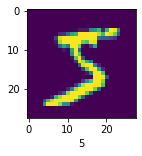

In [7]:
plot_sample(X_train, y_train , 0)

In [8]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [9]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [10]:
y_train.shape

(60000,)

In [11]:
#Normalizing our data
#X_train = X_train/255 
#y_train = y_train/255

In [12]:
#Making our model using cnn 
cnn = keras.Sequential([
    
    keras.layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
 
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

cnn.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
cnn.fit(X_train , y_train , epochs = 10)


Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3549 - accuracy: 0.9409
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0745 - accuracy: 0.9782
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0531 - accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0389 - accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0336 - accuracy: 0.9894
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0271 - accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0216 - accuracy: 0.9934
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0218 - accuracy: 0.9934
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0184 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 31s 17m

In [13]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
cnn.evaluate(X_test , y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1536 - accuracy: 0.9794


[0.15364785492420197, 0.9793999791145325]

In [17]:
y_pred = cnn.predict(X_test)
y_pred

array([[1.9305944e-04, 9.9999392e-01, 9.9723876e-01, ..., 1.0000000e+00,
        3.5103706e-01, 9.9999791e-01],
       [1.6171025e-05, 9.9999392e-01, 1.0000000e+00, ..., 1.2370944e-04,
        9.2874318e-01, 7.2042887e-05],
       [2.5576204e-02, 1.0000000e+00, 7.9636959e-07, ..., 1.0000000e+00,
        3.1966254e-01, 9.9972546e-01],
       ...,
       [8.3140272e-05, 7.4143124e-01, 6.5648556e-04, ..., 9.9427354e-01,
        9.5724368e-01, 9.9999976e-01],
       [9.9890113e-01, 9.9879980e-01, 9.9975026e-01, ..., 7.4640065e-02,
        1.0000000e+00, 9.1481113e-01],
       [4.4481611e-01, 3.0927926e-02, 3.6636145e-06, ..., 1.1612924e-09,
        1.1916727e-02, 8.7654591e-04]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [19]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification_report: \n' , classification_report(y_test , y_pred_classes))

Classification_report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       980
           1       0.53      0.99      0.69      1135
           2       0.53      0.57      0.55      1032
           3       0.51      0.59      0.55      1010
           4       0.94      0.92      0.93       982
           5       0.66      0.41      0.51       892
           6       0.99      0.90      0.94       958
           7       0.86      0.54      0.66      1028
           8       0.96      0.52      0.68       974
           9       0.98      0.89      0.93      1009

    accuracy                           0.74     10000
   macro avg       0.78      0.73      0.74     10000
weighted avg       0.78      0.74      0.74     10000

